In [88]:
# importing general Libarryes 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression ,SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR # Just for trying

In [43]:
df_adv = pd.read_csv(r"D:\X\CodSoft Intern\advertising.csv") # Reading CSV file 

In [44]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [45]:
df_adv.info() # Checking the  info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [46]:
df_adv.describe() # Discovering Important things about DATA

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [47]:
df_adv.isna().sum() # checking Nulls in DATA 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# `EDA`

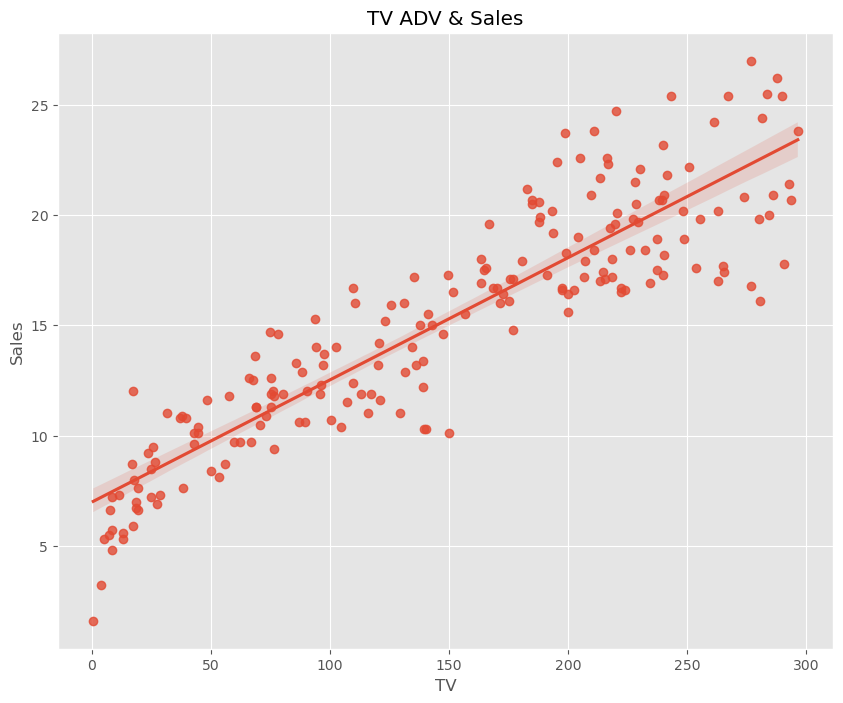

In [48]:
plt.figure(figsize=(10,8))
sns.regplot(data = df_adv , x = 'TV' , y = 'Sales' )
plt.title('TV ADV & Sales')
plt.show()

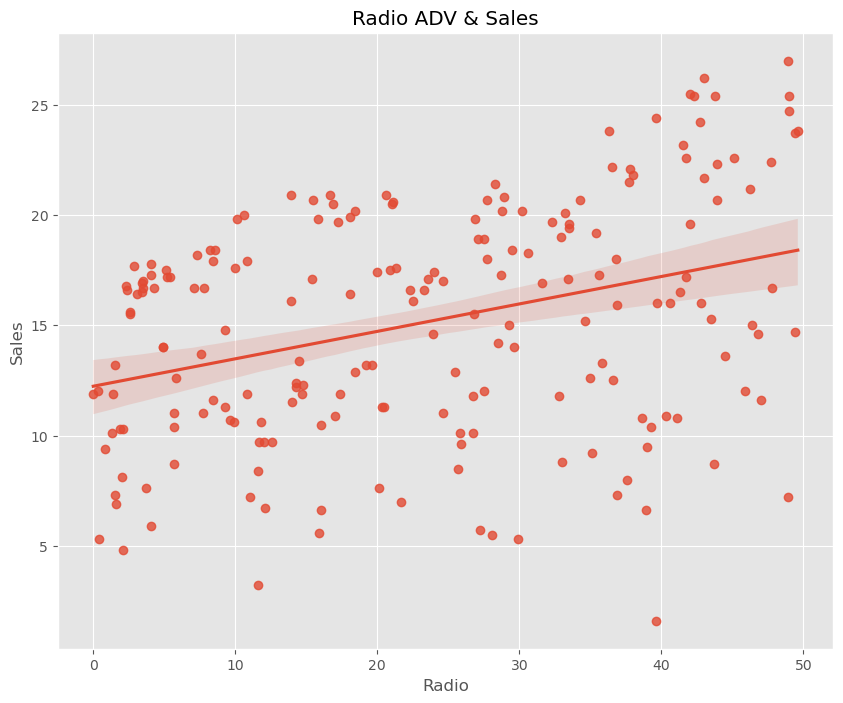

In [49]:
plt.figure(figsize=(10,8))
sns.regplot(data = df_adv , x = 'Radio' , y = 'Sales' )
plt.title('Radio ADV & Sales')

plt.show()

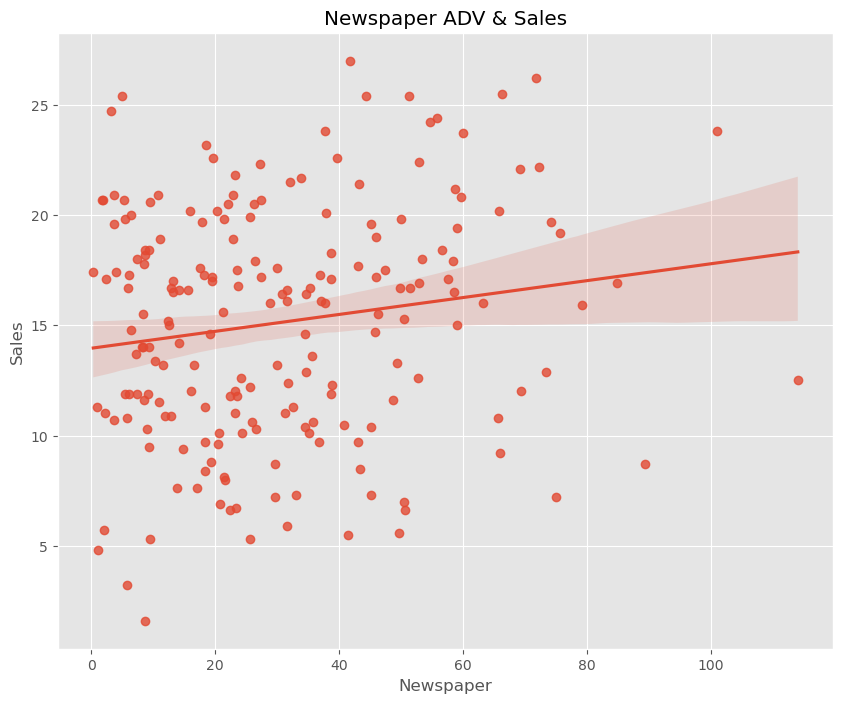

In [50]:
plt.figure(figsize=(10,8))
sns.regplot(data = df_adv , x = 'Newspaper' , y = 'Sales' )
plt.title('Newspaper ADV & Sales')

plt.show()

## ` Heatmap to show how every feature correlated to the Target Feature "Sales"`

<Axes: >

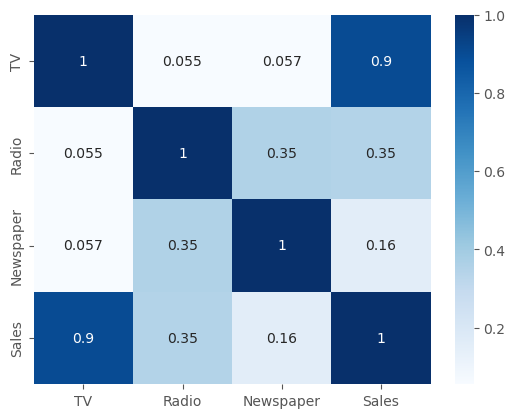

In [51]:
sns.heatmap(data=df_adv.corr() , annot=True , cmap='Blues')

##  We can see clearly that only TV ADV has a very big effect on the Sales but still the other features have impat on it

## Spliting the data ( Willnot using Validation only ( Train , Test )

In [52]:
X = df_adv.drop(columns='Sales')
y = df_adv['Sales']

## ` Standarizing The Data `

In [53]:
std = StandardScaler()
X = std.fit_transform(X)

In [54]:
X_train , X_test , y_train , y_test = train_test_split(X,y )

In [55]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

150
50
150
50


# Machine Learning

## `LinearRegression`

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [123]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('MAE -->',mean_absolute_error(y_train , y_train_pred))
print('MAE -->',mean_absolute_error(y_test , y_test_pred))

MAE --> 1.2315851424659305
MAE --> 1.2505242015135578


## `SGD Regressor`

In [77]:
sgd = SGDRegressor(max_iter=1000, tol=0.0001 ,eta0 = 0.11)
sgd.fit(X_train,y_train)

SGDRegressor(eta0=0.11, tol=0.0001)

In [124]:
y_train_pred = sgd.predict(X_train)
y_test_pred = sgd.predict(X_test)

print('MAE -->',mean_absolute_error(y_train , y_train_pred))
print('MAE -->',mean_absolute_error(y_test , y_test_pred))

MAE --> 1.2316945446905394
MAE --> 1.2504778876174625


## `SVM Regressor`

In [120]:
svr = SVR(kernel='linear',
    degree=6,
    gamma='scale',
    coef0=0.01,
    tol=0.1)
svr.fit(X_train,y_train)

SVR(coef0=0.01, degree=6, kernel='linear', tol=0.1)

In [125]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print('MAE -->',mean_absolute_error(y_train , y_train_pred))
print('MAE -->',mean_absolute_error(y_test , y_test_pred))

MAE --> 1.223955273888376
MAE --> 1.2798888721094601


# DONE